<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Science</center>
# <center>2 - Tabular Data</center>
---

# 1. Load and preprocess data

## 1.1 Load data

In [2]:
import pandas as pd
telcoData = pd.read_csv('./Telco-Churn.csv', index_col='customerID', na_values=' ')

## 1.2 Check missing data

In [3]:
# Work here
telcoData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 1.3 Fix missing data by filling with 0

In [4]:
# Work here
telcoData['TotalCharges'].fillna(0,inplace=True) #ใส่ unknown แทนที่
#suicide_df.fillnull(0)

In [5]:
telcoData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.4 Validate with there are no missing data

In [ ]:
# Work here

In [6]:
telcoData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# 2. Frequency table

## 2.1 Count

In [8]:
pd.crosstab(telcoData['Churn'], columns='Count')

col_0,Count
Churn,
No,5174
Yes,1869


## 2.2 Normalized frequency table

In [9]:
pd.crosstab(telcoData['Churn'], columns='Count', normalize='columns')
##คิดเป็น%

col_0,Count
Churn,
No,0.73463
Yes,0.26537


# 3. Barplot

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

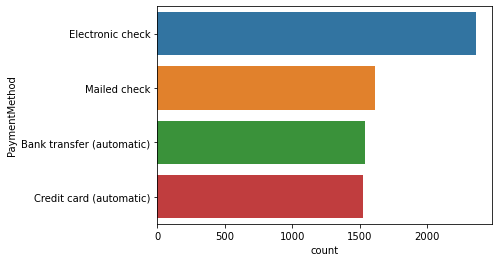

In [10]:
import seaborn as sns
sns.countplot(data = telcoData, y = 'PaymentMethod')
#count by PaymentMethod

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

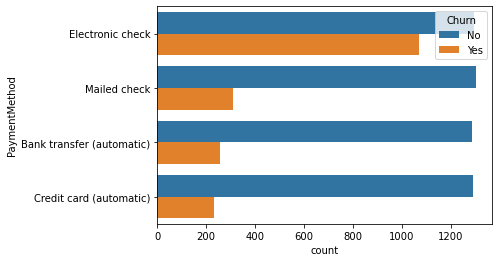

In [11]:
sns.countplot(data = telcoData, y = 'PaymentMethod', hue = 'Churn')
# hue is parameter that you want to use difference colors

# 4. Descriptive statisitcs

In [12]:
telcoData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# 5. Histogram

## 5.1 with Pandas

Text(0, 0.5, 'Frequency')

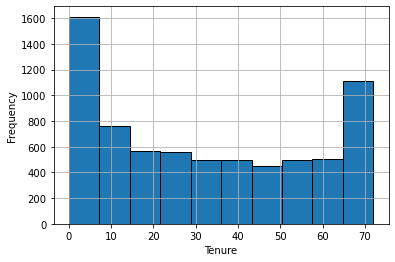

In [13]:
import matplotlib.pyplot as plt
telcoData['tenure'].hist(edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

## 5.2 with seaborn

C:\Users\jirap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure'>

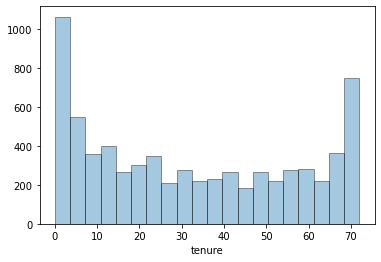

In [15]:
sns.distplot(telcoData['tenure'], 
             bins=20, 
             kde=False, 
             hist_kws={'edgecolor':'black'})

# 6. Crosstab

## 6.1 Crosstab

In [9]:
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


## 6.2 Normalized crosstab

In [11]:
pd.crosstab( index = telcoData['Contract'],
             columns = telcoData['Churn'],
             normalize=True)
#คิดเป็น %

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


## 6.3 Pivot table

In [12]:
import numpy as np
pd.pivot_table(data = telcoData,
               index = ['Contract','PaymentMethod'],
               columns = 'Churn',
               values = 'TotalCharges',
               aggfunc= np.size)\
  .apply(lambda x: x/sum(x), axis = 1)

Churn                                           No       Yes
Contract       PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931751  0.068249
Two year       Bank transfer (automatic)  0.966312  0.033688
               Credit card (automatic)    0.977625  0.022375
               Electronic check           0.922619  0.077381
               Mailed check               0.992147  0.007853

# 7. Stacked bar chart

In [20]:
telcoData['tenure_bin'] = pd.qcut(telcoData['tenure'], q = 5)
# q = number of column

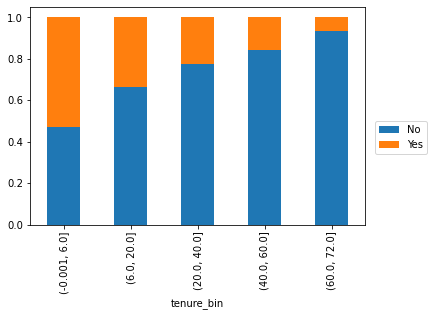

In [21]:
churnByTenure = pd.crosstab(index = telcoData['tenure_bin'],
                            columns = telcoData['Churn'])\
                  .apply(lambda x: x/sum(x), axis = 1)
churnByTenure.plot.bar(stacked = True).legend(bbox_to_anchor=(1.2, 0.5))

# 8. Boxplot

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

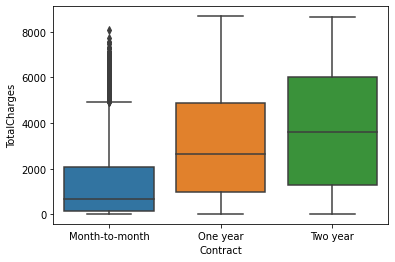

In [15]:
sns.boxplot(data = telcoData, x = 'Contract', y = 'TotalCharges')

# 9. Scatter plot

## 9.1 Non-aggregated scatter plot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

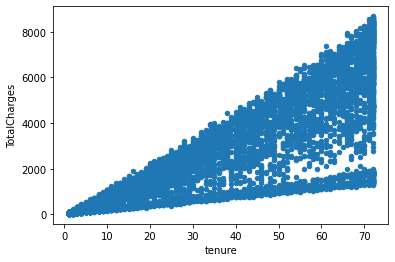

In [16]:
telcoData.plot.scatter(x = 'tenure', y = 'TotalCharges')

## 9.2 Aggregated scatter plot

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

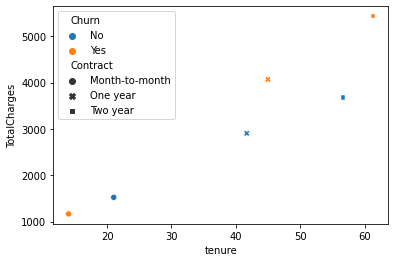

In [17]:
telcoData1 = telcoData.groupby(['Contract','Churn'], as_index=False)\
                      .agg({'tenure':'mean', 'TotalCharges':'mean'})
sns.scatterplot(data = telcoData1, 
                x = 'tenure', 
                y = 'TotalCharges', 
                hue = 'Churn', 
                style = 'Contract')
# style ตัวแสดงสัญลักษณ์

# 10. Correlation

In [18]:
telcoData.corr()
#ดูความสัมพันธ์ของตัวแปรได้

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# 11. Heatmap

<AxesSubplot:>

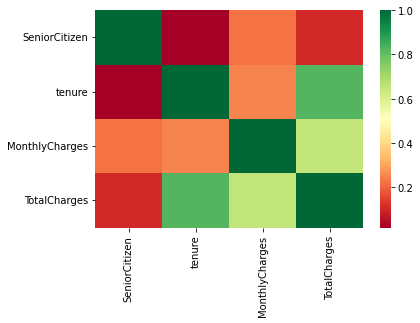

In [19]:
sns.heatmap(telcoData.corr(), cmap = 'RdYlGn')
#ดูความสัมพันธ์ของตัวแปรได้ ยิ่งีค่อนไปทางสีเขียว/เข้าใกล้ 1 = มีความสัมพันธ์กัน
# e.g. : tenure มีความสัมพันธ์กับ TotalCharges

In [2]:
def add(x):
    return (x+1)
y=0
x=y+5
add(x)

6

# Assignment Tabular Data

### 1. Select a data source : WHO Suicide Statistics (1979-2016)
https://www.kaggle.com/szamil/who-suicide-statistics

In [2]:
import pandas as pd
suicide = pd.read_csv('./who_suicide_statistics.csv')

In [3]:
suicide.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
suicide.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

### 2. Identify what form of data it has : Time series table

3. Select one aspect/question of the data, create a visualization to describe the data

#### Question : Which proportion of suicides of any gender is higher than each other.
#### Answer : Male > Female

Text(0.5, 1.0, 'Proportion suicide count by sex (1979-2016)')

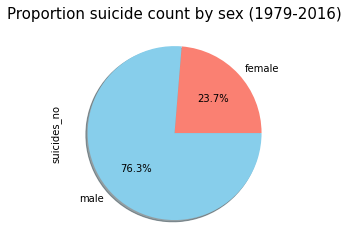

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#change colors
cols = [ 'Salmon','Skyblue']
colors = cols

#percent
prop_sex_suicide = suicide['suicides_no'].dropna().groupby(suicide['sex']).sum() / 1000000
prop_sex_suicide.plot.pie( shadow=True,autopct='%1.1f%%', colors = colors);
plt.title('Proportion suicide count by sex (1979-2016)', fontsize=15)

